This file is created for submitting homework 2 of Machine Learning Zoomcamp.  
**The goal** : to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').

In [1]:
#First of all, I import all necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
#reading the dataset and assign it to a dataframe
df = pd.read_csv('car_fuel_efficiency.csv')

#checking the length of the dataframe
len(df)

9704

In [3]:
#seeing the first 5 rows
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [5]:
#Preparing the dataset that only using 'engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', and 'fuel_efficiency_mpg'
df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]

#checking the new simplified dataset
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


# Exploratory Data Analysis

In [6]:
#checking the summary of dataset
df.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


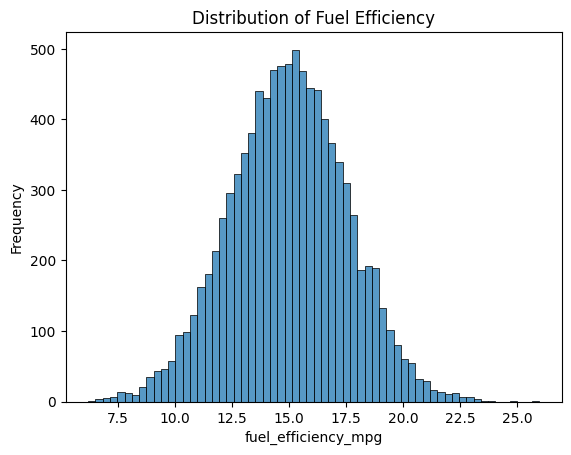

In [7]:
#checking the distribution of 'fuel_efficiency_mpg'
plt.figure()
sns.histplot(df['fuel_efficiency_mpg'])
plt.ylabel('Frequency')
plt.xlabel('fuel_efficiency_mpg')
plt.title('Distribution of Fuel Efficiency')
plt.show()
           

From the graph above we can see that __the Distribution of Fuel Efficiency doesn't have a long tail.__

In [8]:
#checking any missing value in the dataset
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### Question 1
There's one column with missing values. What is it?  
__Answer: horsepower__ (according to the above)

### Question 2
What's the median (50% percentile) for variable 'horsepower'?  
**Answer: 149 (according to the result of this: df.describe())**

# Prepare and split the dataset 

In [9]:
# Shuffle the simplified (filtered) dataset using seed 42.
np.random.seed(42)
n = len(df)
idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]

# Split data in train/val/test sets, with 60%/20%/20% distribution.
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [10]:
y_train_original = df_train.fuel_efficiency_mpg.values
y_val_original = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

# deleting the target y to prevent confusion/mistake in the future by refering back to these values
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

### Question 3

    * We need to deal with missing values for the column from Q1.
    * We have two options: fill it with 0 or with the mean of this variable.
    * Try both options. For each, train a linear regression model without regularization using the code from the lessons.
    * For computing the mean, use the training only!
    * Use the validation dataset to evaluate the models and compare the RMSE of each option.
    * Round the RMSE scores to 2 decimal digits using round(score, 2)
    * Which option gives better RMSE?


In [11]:
#checking the missing value of df_train
df_train.isnull().sum()

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
dtype: int64

In [12]:
#filling the missing values with 0
df_train_0 = df_train.fillna(0)

#checking the missing values of df_train_0
df_train_0.isnull().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
dtype: int64

In [13]:
#computing the mean of horsepower in df_train with missing values and assign it to variable
mean_of_hp = df_train['horsepower'].mean()

#filling the missing values with mean
df_train_mean = df_train.fillna(mean_of_hp)


### Linear Regression

In [14]:
# Defining Linear Regression
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

### Baseline Solution

In [15]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [16]:
#training with df_train_0
X_train_0 = prepare_X(df_train_0)
w_0, w = train_linear_regression(X_train_0, y_train)

In [17]:
#prediction if the missing values replaced by 0
y_pred_0 = w_0 + X_train_0.dot(w)

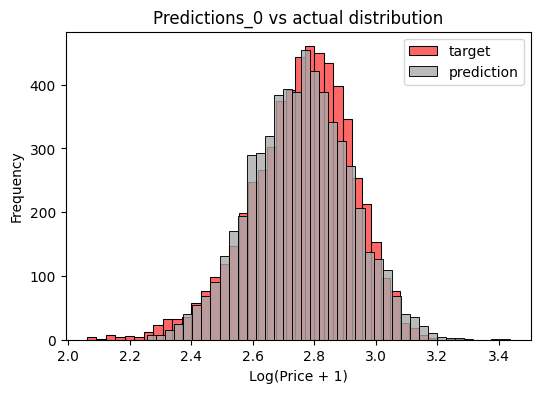

In [18]:
#comparing the prediction graph to the actual value
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#FF0000', alpha=0.6, bins=40)
sns.histplot(y_pred_0, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions_0 vs actual distribution')

plt.show()

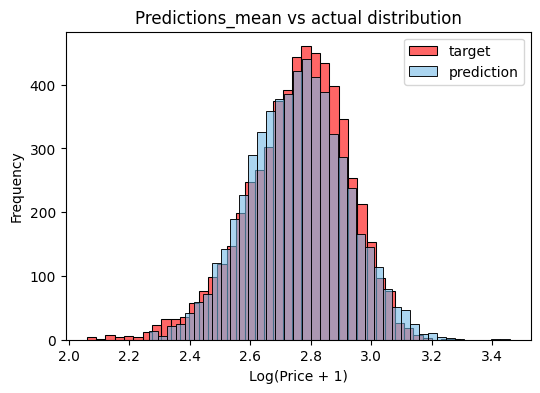

In [19]:
#training with df_train_mean
X_train_mean = prepare_X(df_train_mean)
w_0, w = train_linear_regression(X_train_mean, y_train)

#prediction if the missing values replaced by mean
y_pred_mean = w_0 + X_train_mean.dot(w)

#comparing the prediction graph that missing values replaced by mean to the actual value
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#FF0000', alpha=0.6, bins=40)
sns.histplot(y_pred_mean, label='prediction', color='#74b9e6', alpha=0.6, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions_mean vs actual distribution')

plt.show()

In [20]:
#defining Root Mean Square Error
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)


In [21]:
# Calculating Root Mean Square Error (RMSE) missing values replaced by 0 and rounded to 2 decimal
rmse_0 = round(rmse(y_train, y_pred_0), 2)
rmse_0

np.float64(0.04)

In [22]:
# Calculating Root Mean Square Error (RMSE) missing values replaced by mean and rounded to 2 decimal
rmse_mean = round(rmse(y_train, y_pred_mean), 2)
rmse_mean

np.float64(0.04)

**Answer of Question 3 : Both are equally good**

### Question 4

   * Now let's train a regularized linear regression.
   * For this question, fill the NAs with 0.
   * Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
   * Use RMSE to evaluate the model on the validation dataset.
   * Round the RMSE scores to 2 decimal digits.
   * Which r gives the best RMSE?

If multiple options give the same best RMSE, select the smallest r.

In [23]:
#defining regularized linear regression
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]


In [24]:
#train by filling the NAs with 0
X_train_0 = prepare_X(df_train_0)

#try different r values:  [0, 0.01, 0.1, 1, 5, 10, 100]
for r in  [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train_0, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[1], w[3]))


    0, 3.66, 0.00, 0.00
 0.01, 3.17, 0.00, 0.00
  0.1, 1.43, 0.00, 0.00
    1, 0.22, 0.00, 0.00
    5, 0.05, 0.00, 0.00
   10, 0.02, 0.00, 0.00
  100, 0.00, 0.00, 0.00


In [25]:
#train regularized linear regression for NAs replaced by 0 AND r=0
w_0, w = train_linear_regression_reg(X_train_0, y_train, r=0)

y_pred_0 = w_0 + X_train_0.dot(w)
print('train', rmse(y_train, y_pred_0))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))


train 0.0390863253926525
val 0.03997925782165814


In [26]:
#train by filling the NAs with 0
X_train_0 = prepare_X(df_train_0)
X_val = prepare_X(df_val)

#comparing all regularized linear regression with various r:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train_0, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))



     0 0.03997925782165814
  0.01 0.03997787201756819
   0.1 0.04050873984540411
     1 0.04135385150830496
     5 0.041506118232746234
    10 0.041526801237517695
   100 0.041545756560812074


**Answer of Q4: 1. Since 1, 5, 10, 100 give the same result, AND according to the hint to choose the smallest number if multiple options give the same best RMSE.**

### Question 5

   * We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
   * Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
   * For each seed, do the train/validation/test split with 60%/20%/20% distribution.
   * Fill the missing values with 0 and train a model without regularization.
   * For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
   * What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
   * Round the result to 3 decimal digits (round(std, 3))

What's the value of std?

In [27]:
#Try different seed values
#Creating seed array 
seed_array = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_results = []

for i in seed_array:
    #Set the random seed
    np.random.seed(i)
    
    #Defining partitions sizes: train/validation/test split with 60%/20%/20% distribution
    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    #Shuffle indices 
    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    #Creating shuffled dataset with defined sizes
    df_train_temp = df_shuffled.iloc[:n_train].copy()
    df_val_temp = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test_temp = df_shuffled.iloc[n_train+n_val:].copy()

    #Log normalization of target variable from all partitions 
    y_train_temp = np.log1p(df_train_temp.fuel_efficiency_mpg.values)
    y_val_temp = np.log1p(df_val_temp.fuel_efficiency_mpg.values)
    y_test_temp = np.log1p(df_test_temp.fuel_efficiency_mpg.values)
    
    #delete original coloumn to avoid mistake
    del df_train_temp['fuel_efficiency_mpg']
    del df_val_temp['fuel_efficiency_mpg']
    del df_test_temp['fuel_efficiency_mpg']
    
    #Fill NAs of training and validation partitions with 0 
    X_train_temp = df_train_temp.fillna(0)
    X_val_temp = df_val_temp.fillna(0)

    #Train linear regression model 
    w_0_temp, w_temp = train_linear_regression(X_train_temp, y_train)

    #obtain predictions 
    y_pred_temp = w_0_temp + X_val_temp.dot(w_temp)

    #RMSE
    rmse_temp = round(rmse(y_val_temp, y_pred_temp),5)
    
    #Adding RMSE to the results array 
    rmse_results.append(rmse_temp)

np_array_rmse = np.array(rmse_results)

std_rmse_results = round(np.std(np_array_rmse), 3)

print(f'RMSE LR standard deviation: {std_rmse_results}')


RMSE LR standard deviation: 0.002


**Answer: 0.001 since it is the closest to 0.002**

# Question 6

   * Split the dataset like previously, use seed 9.
   * Combine train and validation datasets.
   * Fill the missing values with 0 and train a model with r=0.001.
   * What's the RMSE on the test dataset?


In [41]:
#Set the random seed
np.random.seed(9)
    
#Defining partitions sizes: train/validation/test split with 60%/20%/20% distribution
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

#Shuffle indices 
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

#Creating shuffled dataset with defined sizes
df_train_org = df_shuffled.iloc[:n_train].copy()
df_val_org = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test_org = df_shuffled.iloc[n_train+n_val:].copy()

#Log normalization of target variable from all partitions 
y_train_org = np.log1p(df_train_org.fuel_efficiency_mpg.values)
y_val_org = np.log1p(df_val_org.fuel_efficiency_mpg.values)
y_test_org = np.log1p(df_test_org.fuel_efficiency_mpg.values)
    
#delete original coloumn to avoid mistake
del df_train_org['fuel_efficiency_mpg']
del df_val_org['fuel_efficiency_mpg']
del df_test_org['fuel_efficiency_mpg']

#Combining train and validation dataset
df_train_val = pd.concat([df_train_org,df_val_org])
df_train_val = df_train_val.reset_index(drop=True)

#Fill NAs of training and validation, and test partitions with 0 
X_train_val = df_train_val.fillna(0)
X_test_org = df_test_org.fillna(0)

# Concatenate training and validation target values 
y_train_val = np.concatenate([y_train_org, y_val_org])

#Train linear regression model 
w_0_train_val, w_train_val = train_linear_regression_reg(X_train_val, y_train_val, r=0.001)

#obtain predictions 
y_pred_train_val = w_0_train_val + X_test_org.dot(w_train_val)

#RMSE
rmse_test = round(rmse(y_test_org, y_pred_train_val),3)

print(f'RMSE LR test dataset: {rmse_test}')

RMSE LR test dataset: 0.039


**Answer: the RSME test dataset is 0.039**